# Get bounding boxes from Urban Atlas FUA and City polygons
Download data from https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/urban-audit and save to `data/city_features_collection`

In [ ]:
import numpy as np
from shapely.geometry import MultiLineString, MultiPolygon, Polygon, box, shape
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# read in the city and fua polygons
INPUT_FILE_city = "../../../data/city_features_collection/URAU_RG_100K_2021_4326.geojson"
geo_json_city = gpd.read_file(INPUT_FILE_city)
gdf_city = gpd.GeoDataFrame(geo_json_city, crs="EPSG:4326")
# compute bounding boxes
gdf_city = pd.concat([gdf_city, gdf_city.bounds], axis=1)

## Data visualization

In [ ]:
# plot all polygons on a map
gdf_city.explore()

In [5]:
# display as table
gdf_city.head()

,URAU_CODE,URAU_CATG,CNTR_CODE,URAU_NAME,CITY_CPTL,FUA_CODE,AREA_SQM,NUTS3_2021,geometry,minx,miny,maxx,maxy
0,IT030F,F,IT,Foggia,None,None,8.975633e+08,ITF46,"POLYGON ((15.5801 41.6102, 15.58357 41.60901, ...",15.167245,41.240676,15.788208,41.612040
1,IT021F,F,IT,Taranto,None,None,1.052095e+09,ITF43,"MULTIPOLYGON (((17.17662 40.68423, 17.18236 40...",16.956956,40.294625,17.610300,40.684863
2,IT011F,F,IT,Venezia,None,None,6.612116e+08,ITH35,"MULTIPOLYGON (((12.50936 45.5036, 12.51156 45....",12.034182,45.104437,12.585614,45.614292
3,IT022F,F,IT,Potenza,None,None,1.383780e+09,ITF51,"POLYGON ((15.71785 40.88409, 15.71828 40.88267...",15.532023,40.429499,16.151284,40.884093
4,IT035F,F,IT,La Spezia,None,None,4.078554e+08,ITC34,"MULTIPOLYGON (((9.83614 44.27746, 9.83594 44.2...",9.668620,44.033447,10.063098,44.281627


(50.783137499000034, 51.33085349900004)

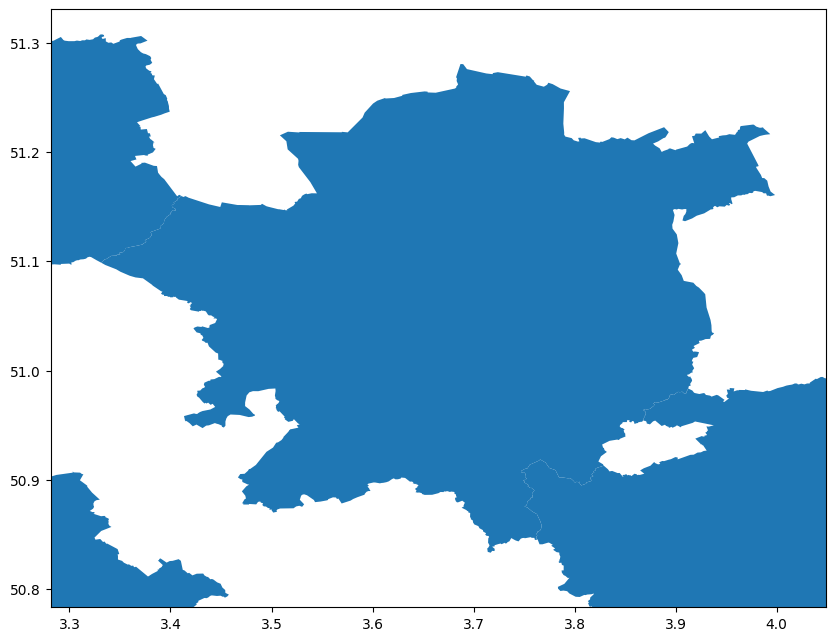

In [10]:
# plot one poligon by name
fig, ax = plt.subplots(figsize=(10, 10))
gdf_city.plot(ax=ax)

xmin, ymin, xmax, ymax = gdf_city[gdf_city.URAU_NAME == 'Gent'].total_bounds
# xmin, ymin, xmax, ymax = gdf[gdf.URAU_NAME == 'Taranto'].total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)

## Save csv with city code and bounding boxes

In [11]:
gdf_bb_city = gdf_city[["URAU_CODE","URAU_NAME","minx","miny","maxx","maxy"]]
gdf_bb_city.to_csv("../../../data/city_features_collection/URAU_RG_100K_2021_4326_bunding_boxes.csv", index=False)